In [9]:
## Detecting Outliers
## How to define an outlier?
## 1.  Q1 - 1.5* IQR  or Q3 +1.5* IQR
## 2. z score >3 or z score < -3
## 3. Outside whiskers of boxplot
'''
請參閱範例Day_010_Outliers.ipynb : 房價預測
作業1 : 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限，看看能否再進一步提高分數?
作業2 : 續前題，去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值，請試著用同樣的上下限，改為 '捨棄離群值' 的方法，看看結果會變好還是變差? 並試著解釋原因。
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [27]:
## Example
input_path = "/Users/justin/Downloads/Day9/"
house_train=pd.read_csv(input_path+"house_train.csv.gz")
house_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


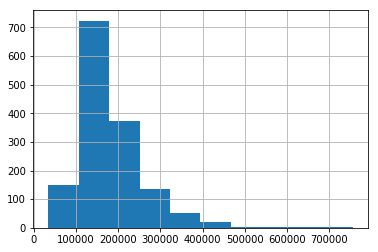

In [28]:
house_train.SalePrice.hist()
plt.show()

In [30]:
## 對SalesPrice取 log
#house_train.columns[-1]
## Sale Price is Y 
train_Y= np.log1p(house_train['SalePrice'])
house_train_2 = house_train.drop(['Id','SalePrice'] , axis=1)


In [44]:
house_train_2.dtypes.unique()
## check how many different data types among all 79 columns 

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [76]:
house_numeric=(house_train_2.dtypes[(house_train_2.dtypes=="int64")|(house_train_2.dtypes=="float64")]).index
## retain numeric columns
house_numeric = house_train_2[house_numeric]
house_numeric.columns
house_numeric=house_numeric.fillna(-1)
MMEncoder = MinMaxScaler()

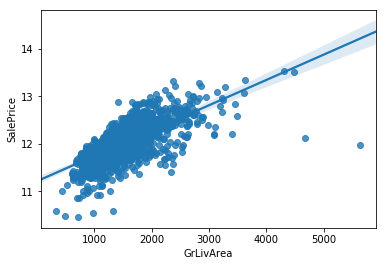

In [77]:
import seaborn as sns
house_numeric['GrLivArea']
sns.regplot(x = house_numeric['GrLivArea'], y=train_Y)
plt.show()

In [66]:
# Linear regression using scikit learn

train_x = MMEncoder.fit_transform(house_numeric)
lr = LinearRegression()
cross_val_score(lr, train_x, train_Y, cv=5).mean()


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8499463091778436

(1460, 36)

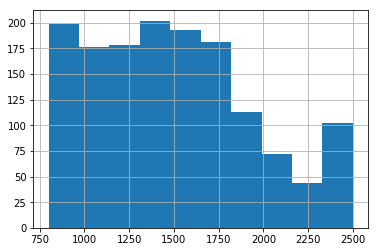

In [88]:
house_numeric['GrLivArea'].hist()
house_numeric.shape

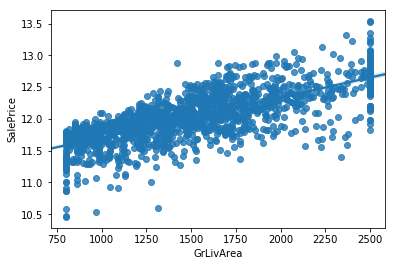

In [92]:
house_numeric['GrLivArea'] =house_numeric['GrLivArea'].clip(800, 2500)
## 這個clip並沒有動到原本資料或做刪減，只是把範圍集中
#house_numeric['GrLivArea'].hist()
sns.regplot(x = house_numeric['GrLivArea'], y=train_Y)
plt.show()

In [93]:
train_X = MMEncoder.fit_transform(house_numeric)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8590286613713278

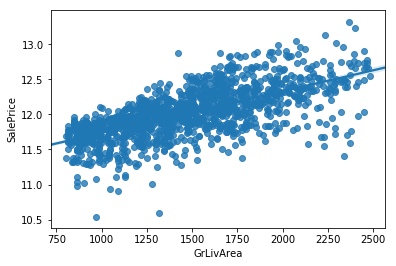

In [98]:
keep=(house_numeric['GrLivArea']>800)&(house_numeric['GrLivArea']<2500)
house_keep=house_numeric[keep]
train_Y=train_Y[keep]
sns.regplot(x = house_keep['GrLivArea'], y=train_Y)
plt.show()



In [99]:
train_X = MMEncoder.fit_transform(house_keep)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.876503217899495